# Modelos de regressão

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2020.

## Regressão linear simples

Vimos que para a regressão linear simples, temos o modelo: $Y \approx \beta_0 + \beta_1 X$

Vamos implementar esse método a seguir. Inicialmente, definimos os dados.

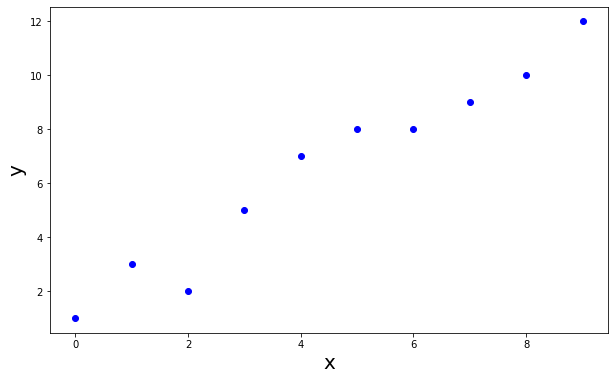

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# define os dados
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
plt.figure(figsize=(10,6))

plt.plot(x, y, 'bo')
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20) 
plt.show(True)  

A seguir, implementamos uma função para calcular os coeficientes.

Estimando os coeficiente através do método dos mínimos quadrados, obtemos:
    $$
    \begin{cases}
    \hat{\beta}_1=\frac{\sum_{i=1}^n (x_i- \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{S_{xy}}{S_{xx}}\\
    \hat{\beta}_0= \bar{y}-\hat{\beta_1}\bar{x}
    \end{cases}
    $$

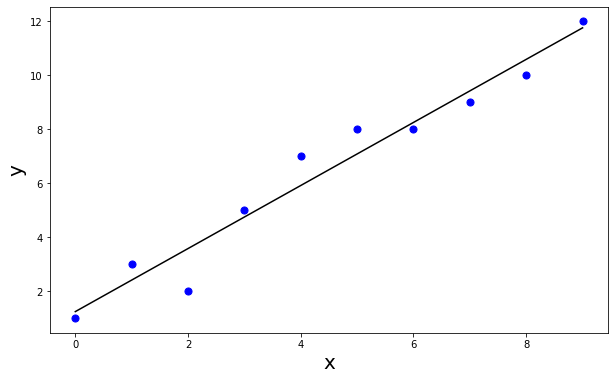

Estimated coefficients:
b_0 = 1.2363636363636363  
b_1 = 1.1696969696969697


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from statistics import variance 
import math as math

def estimate_coef(x, y): 
    n = np.size(x) # number of observations
    m_x, m_y = np.mean(x), np.mean(y) #mean values
    S_xy = 0
    S_xx = 0
    # calculate the covariance and variance
    for i in range(0, len(x)):
        S_xy = S_xy + (x[i]-m_x)*(y[i]-m_y)
        S_xx = S_xx + (x[i]-m_x)**2
    #determine the coefficients
    b_1 = S_xy / S_xx 
    b_0 = m_y - b_1*m_x 
    return(b_0, b_1) 

# data 
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 

b = estimate_coef(x, y) 
# perform the prediction
y_pred = b[0] + b[1]*x 
# plot the data points
plt.figure(figsize=(10,6))
plt.scatter(x, y, color = "b", marker = "o", s = 50) 
# show the adjusted model
plt.plot(x, y_pred, color = "black") 
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20) 
plt.savefig('regress.svg')
plt.show(True) 
print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 

Uma medida importante é o coeficiente R2, que mede a proporção da variabilidade em Y que pode ser explicada a partir de X.
$$
R^2 = \frac{S_{xy}^2}{S_{xx}S_{yy}}  = \frac{\left( \sum_{i=1}^n (x_i- \bar{x})(y_i - \bar{y})\right)^2}{\sum_{i=1}^n (x_i - \bar{x})^2\sum_{i=1}^n (y_i - \bar{y})^2}
$$

In [3]:
import numpy as np

def R2(x,y):
    n = len(x)
    m_x, m_y = np.mean(x), np.mean(y) 
    S_xy = 0
    S_xx = 0
    S_yy = 0
    for i in range(0, len(x)):
        S_xy = S_xy + (x[i]-m_x)*(y[i]-m_y)
        S_xx = S_xx + (x[i]-m_x)**2
        S_yy = S_yy + (y[i]-m_y)**2     
    R2 = (S_xy**2)/(S_xx*S_yy)
    return R2

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
print('R2:', R2(x,y))

R2: 0.952538038613988


Quanto mais próximo de um, melhor é o ajuste da regressão linear.

Podemos ainda usar a biblioteca sciklearn:

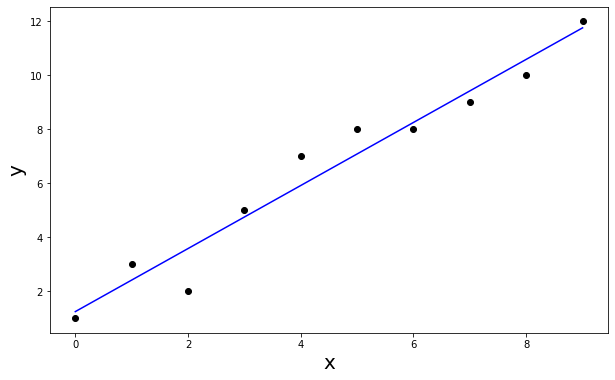

Estimated coefficients:
b_0 = 1.2363636363636363  
b_1 = 1.1696969696969697


In [4]:
from sklearn.linear_model import LinearRegression
x = x.reshape(-1, 1)
reg = LinearRegression().fit(x, y)

y_predicted = reg.predict(x)

plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', color='black');
plt.plot(x,y_predicted,color='blue')
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20) 
plt.show(True) 
print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 

Coeficiente R2:

In [5]:
R2 = reg.score(x, y)
print('R2:', R2)

R2: 0.952538038613988


Teste de hipóteses:

$$
H_0:\beta_1 = 0
$$
$$
H_1: \beta_1 \neq 0
$$

In [6]:
print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 

import statsmodels.api as sm
x_with_intercept = np.c_[np.ones(x.shape[0]), x]
sm.OLS(y, x_with_intercept).fit().summary()

Estimated coefficients:
b_0 = 1.2363636363636363  
b_1 = 1.1696969696969697


/Users/francisco/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     160.6
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           1.41e-06
Time:                        17:20:40   Log-Likelihood:                -11.312
No. Observations:                  10   AIC:                             26.62
Df Residuals:                       8   BIC:                             27.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2364      0.493      2.509      0.036       0.100       2.373
x1             1.1697      0.092     12.671      0.000       0.957       1.383
==============================================================================
Omnibus:                        0.948   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.392
Skew:                          -0.461   Prob(JB):                        0.822
Kurtosis:                       2.702   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regressão linear múltipla

O modelo de regressão linear multivariado é definido por:<br>
$$
Y_j=\beta_0 + \beta_1 X_{1j} + \beta_2 X_{2j} + \beta_3 X_{3j}+\beta_4 X_{4j} + \epsilon_j.
$$
onde:
- $Y_j$: variável resposta (dependente),
-  $\beta_i$: parâmetros desconhecidos,
-  $X_{ij}$: variáveis explicativas (covariáveis, variáveis independentes),
-  $\epsilon_j$: erro aleatório.

Nesse modelo, temos as seguintes suposições:
-  $E(\epsilon_j)=0$ para $ j=1,\ldots,n$,
-  $Var(\epsilon_j) = \sigma^2$ para $ j=1,\ldots,n$,
-  $Cov(\epsilon_i,\epsilon_j)=0$ para $ i,j=1,\ldots,n$ e $i\neq j$.

Na forma matricial:

$$Y=\left[\begin{array}{c}Y_1\\ Y_2\\ \vdots \\ Y_n\end{array}\right], \ 
X = \left[\begin{array}{cccc}
1 & X_{11} & \ldots & X_{1k} \\ 
1 & X_{21} & \ldots & X_{2k} \\
\vdots & \vdots & \ddots & \vdots\\
1 & X_{n1} & \ldots & X_{np} \\
\end{array}\right], \beta = \left[\begin{array}{c}\beta_0\\ \beta_1\\\vdots \\ \beta_p\end{array}\right], \  \epsilon = \left[\begin{array}{c}\epsilon_1\\ \epsilon_2\\\vdots \\ \epsilon_n\end{array}\right]
$$  

ou seja, 

$$Y_{n\times 1} = X_{n\times (p+1)} \beta_{(p+ 1)\times 1} + \epsilon_{n\times 1}. $$


Para o caso multivariado, a estimação dos coeficientes pelos métodos:

- Método de mínimos quadrados ordinários (EMQ ou MQO) <br>

- Método de máxima verossimilhança (EMV)<br>

Resulta na relação:
$$
\hat{\beta} = (\text{X}^T \text{X})^{-1} \text{X}^T \text{y}
$$

- $\beta_0$: valor esperado de $Y$ quando $X_{1i}, X_{2i}, \ldots, X_{pi}$ são todas zero.

- $\beta_k$: aumento esperado em $Y$ quando $X_k$ é acrescido de uma unidade e todas as outras são mantidas fixadas, $k=1,\ldots,p$.

No modelo linear geral
$$
Y = X \beta + \epsilon
$$

com as suposições:
- $E( \epsilon) = {0}$,
- $Var( \epsilon) = \sigma^2 I$,


o **estimador de mínimos quadrados** que minimiza a soma de quadrados dos resíduos, é dado por

$$\widehat{\beta} = (X ^{\top} X)^{-1} X ^{\top} Y.$$

			
Se $\epsilon\sim N({0},\sigma^2 I)$, então
			
o **estimador de máxima verossimilhança** de $\beta$ é dado (também) por

$$\widehat{\beta} = (X^{\top} X)^{-1} X^\top Y.$$

Nesse caso, 

$$\widehat{\beta} \sim N\left(\beta, \sigma^2 (X^\top X)^{-1}\right)$$

e é comum estimar $\sigma^2$ com


$$\widehat{\sigma}^2 = MSE.$$
			

O valor ajustado de $Y$, para um determinado $X = x$ é dado por: 
$$\hat{Y} = x {\hat{\beta}}.$$

O erro quadrático médio, MSE, é usado para estimar $\sigma^2$:
$$\hat{\sigma}^2 = \displaystyle{\frac{SQE}{n-p}} =  \displaystyle{\frac{\displaystyle\sum_{i=1}^{n}(Y-\hat{Y})^\top(Y-\hat{Y})  }{n-k}} 
$$

O coeficiente de determinação, ou coeficiente de explicação do modelo, é dado por

$$
R^2 = 1 - \displaystyle {\frac{SQE}{SQT}},
$$
em que $SQT = Y^\top Y  -  \displaystyle\frac{1}{n}Y^\top \mathbb{1}^\top \mathbb{1} Y$, em que $\mathbb{1}$ indica um vetor de uns de mesma dimensão de $Y$.

Para levar em conta o aumento da explicação da variabilidade da resposta quando aumentamos o número de covariáveis, é comum considerar o coeficiente de determinação do modelo ajustado:


$$R^2_{ajustado} = 1 - \displaystyle {\frac{n-1}{n-p}\frac{SQE}{SQT}}.$$


Tanto $R^2$ quanto $R^2_{ajustado}$ estão entre 0 e 1, e pode ser usado como um **indício** de qualidade do ajuste, quanto maior o coeficiente de determinação, melhor é o modelo linear. 




Beta: [[0.32421606]
 [0.91756707]
 [0.91897682]]


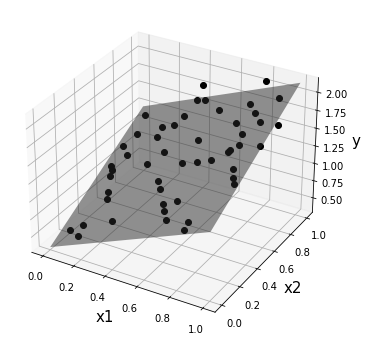

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

n = 50 #number of observations
#randomly generated data
x1 = np.random.uniform(0,1, (n, 1));
x2 = np.random.uniform(0,1, (n, 1));
er = np.random.uniform(0,0.5, (n, 1))
y = x1 + x2 + er

#combining of the features into a [m x 3] matrix
X = np.hstack((x1, x2))
X = np.hstack((np.ones((n, 1)), X ))

#calculating of the beta using the normal equation
beta = np.dot(np.dot(np.linalg.pinv(np.dot(X.transpose(), X)), X.transpose()), y)
print('Beta:',beta)

#plane calculation
k = 2#size of the plane
p1, p2 = np.mgrid[:k, :k]
P = np.hstack(( np.reshape(p1, (k*k, 1)), np.reshape(p2, (k*k, 1))))
P = np.hstack(( np.ones((k*k, 1)), P))
plane = np.reshape(np.dot(P, beta), (k, k));

#plotting
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
ax.plot(x1[:,0],x2[:,0],y[:,0],'ko') #scatter plot
ax.plot_surface(p1,p2,plane, color='gray',alpha=.5) #plane plot
ax.set_xlabel('x1', fontsize = 15)
ax.set_ylabel('x2', fontsize = 15)
ax.set_zlabel('y', fontsize = 15)
plt.savefig('regress-3d.svg')
plt.show()

In [65]:
from sklearn.metrics import r2_score
y_pred = np.dot(X, beta)
R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.884290586189131


## Variáveis não lineares

Notem que o modelo não precisa ter termos lineares em X, mas apenas nos parâmetros. Por exemplo, modelo abaixo ainda é linear nos parâmetros: $$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon$$

Vamos considerar um exemplo.

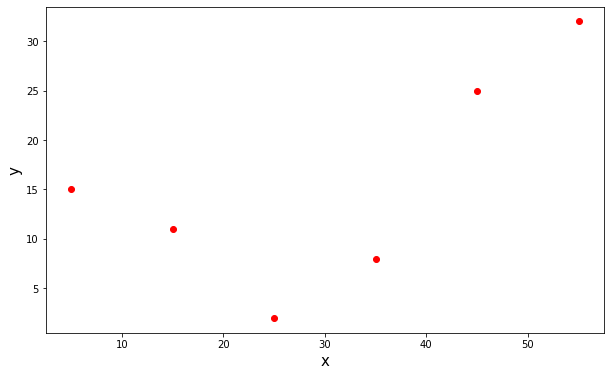

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([15, 11, 2, 8, 25, 32])
plt.figure(figsize=(10,6))
plt.plot(x,y, 'ro')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.show(True)

Geramos os dados quadráticos inserindo mais uma coluna.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# define a transformação nos dados
transformer = PolynomialFeatures(degree=2, include_bias=False)
x = x.reshape((-1, 1))
transformer.fit(x)
print('Dados originais:\n', x)

# transforma os dados incluindo uma nova coluna com valores quadráticos
x_ = transformer.transform(x)
print('Novos dados:\n', x_)

Dados originais:
 [[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
Novos dados:
 [[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


O modelo será dado por: $$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon$$

Vamos aplicar a regressão linear:

In [18]:
model = LinearRegression().fit(x_, y)
y_pred = model.predict(x_)

Mostrando os valores preditos ($\hat{y}$) e os originais ($y$):

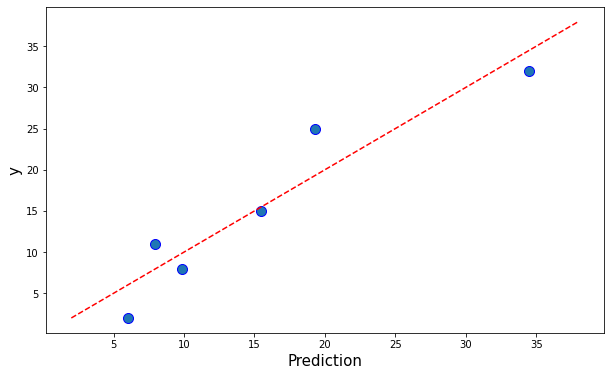

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

Mostrando os valores no gráfico original:

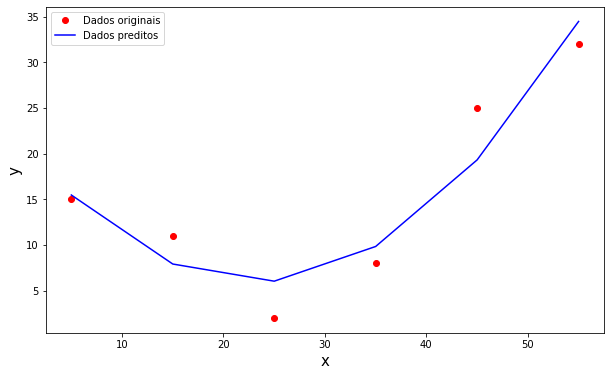

In [20]:
plt.figure(figsize=(10,6))
plt.plot(x,y, 'ro', label='Dados originais')
plt.plot(x,y_pred, 'b-', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.legend()
plt.show(True)

O coeficiente R2:

In [21]:
from sklearn.metrics import r2_score
R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.8908516262498563


Portanto, para ajustar um modelo com variáveis não lineares, basta gerarmos um novo conjunto de dados inserindo novas colunas aos dados originais e realizar o procedimento de regressão multivariada. Cada coluna inserida contém os dados originais elevados a uma potência definida pelos termos do modelo.

## Análise de diagnóstico

Os resíduos contém indicativos de adequabilidade das suposições do modelo


Os **resíduos ordinários** do modelo são dados por

$$
e =  Y-\widehat{Y}.
$$

É comum construir gráficos dos resíduos ordinários contra a ordem das observações, os valores ajustados $\widehat{Y}$ e $X_i$, para algumas das variáveis preditoras de interesse.


Espera-se que os resíduos sejam aleatoriamente distribuídos em torno de zero.



Alguns padrões de resíduos são ilustrados a seguir:


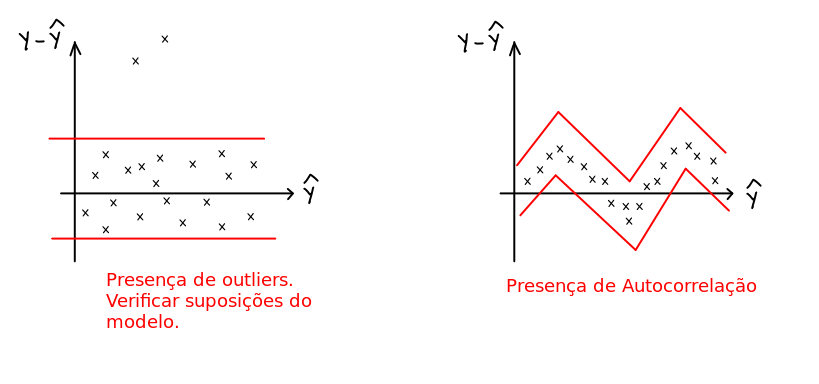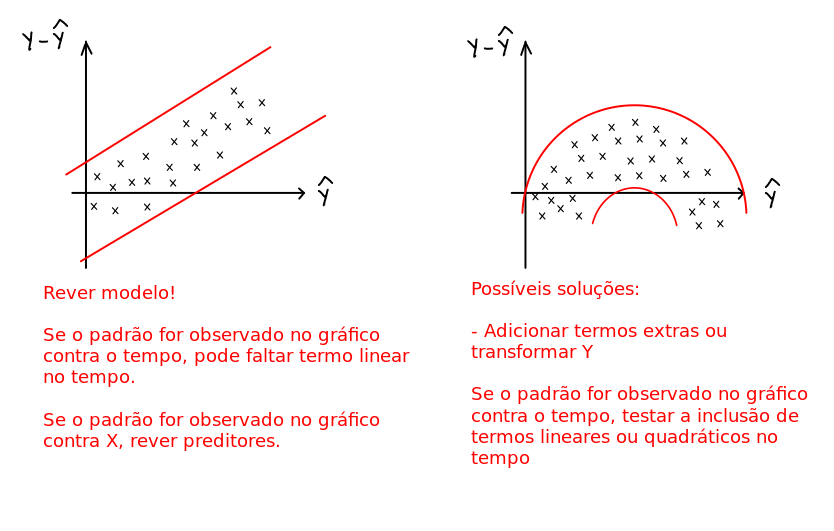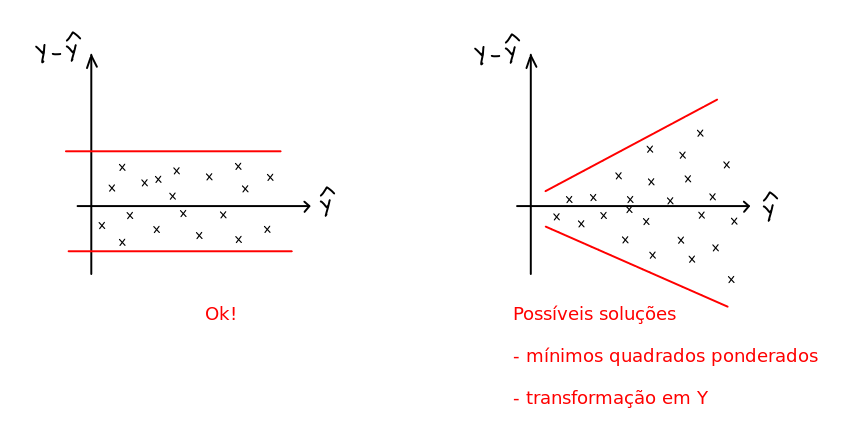

## Predizendo o preço de casas

Vamos considerar dados reais e a biblioteca scikit-learn. Inicialmente, carregamos os dados.

In [ ]:
#import sklearn
#import pandas as pd

#boston_houses = sklearn.datasets.load_boston()
#df = pd.DataFrame(boston_houses['data'], columns=boston_houses['feature_names'])
#df['price'] = boston_houses['target']

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# le os dados
data = pd.read_csv('data/BostonHousing.csv', header=(0))
# valor a ser predito
ylabel = data.columns[-1]
print("Número de linhas e colunas:", data.shape)
data.head(10)

Número de linhas e colunas: (506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


Transformos os dados para o formato numpy para facilitar o acesso.

In [27]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Selecionamos os conjuntos de teste e treinamento, sendo que $p$% dos dados serão usados como teste e (1-p)%, como treinamento.

In [28]:
from sklearn.model_selection import train_test_split
# divide o conjunto em treinamento e teste
p = 0.3 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

O ajuste dos coeficientes da regressão linear é feito usando apenas o conjunto de treinamento.

In [29]:
from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

Notem que como temos várias variáveis, não é possível mostrar os resultados em mais de três dimensões. Nesse caso, uma maneira de visualizar a precisão na predição é graficar os valores reais versus as predições, como mostramos abaixo.

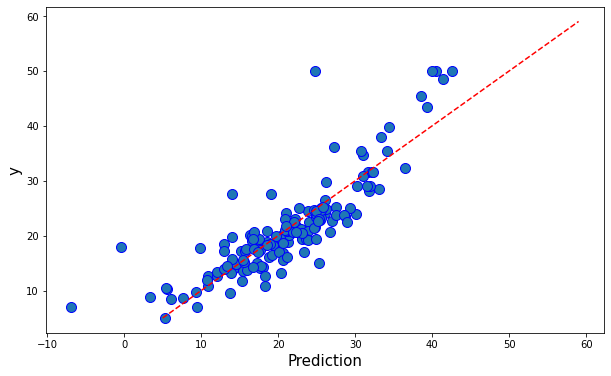

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)


Quanto mais próximo da reta em vermelho, melhor será a predição, pois essa reta representa o caso em que $\hat{y} = y$.

Para quantificarmos o ajuste, calculamos o coeficiente R2.

In [32]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.7112260057484948


In [ ]:
from statsmodels.formula.api import ols

#Ajusta o modelo de regressão linear simples para o preço das casas
mod = ols('medv~crim + zn +indus + chas + nox + rm + age +dis +rad +tax +ptratio + b + lstat',data=data)
res = mod.fit()
print(res.summary())

Vamos analisar os resíduos.

ERROR! Session/line number was not unique in database. History logging moved to new session 144


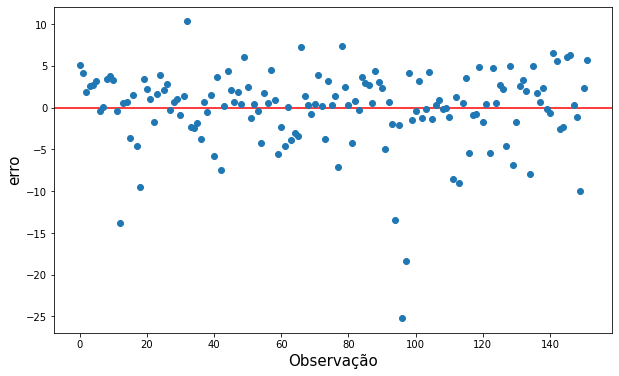

In [33]:
e = np.array(y_pred - y_test)
t = np.arange(0,len(e))
plt.figure(figsize=(10,6))
plt.axhline(y=0, color = 'red')
plt.plot(t,e,'o')
plt.ylabel("erro", fontsize=15)
plt.xlabel("Observação", fontsize=15)

plt.show(True)

Vemos que há alguns pontos que parecem outliers. A sua remoção, pode melhorar o modelo, mas precisamos ter cuidado para não removermos observações que fazem parte dos dados e são significativas.